Importing the dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [2]:
car_dataset = pd.read_csv('/content/car data.csv')

In [3]:
car_dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#checking the number of rows and columns
car_dataset.shape

(301, 9)

In [5]:
# getting some information about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_dataset.isnull() # finding any missing values

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [7]:
# checking the distribution of categorial data
print(car_dataset.Fuel_Type.value_counts()) # on the basis of fuel type
print(car_dataset.Seller_Type.value_counts()) # on the basis of dealer type
print(car_dataset.Transmission.value_counts()) # on the basis of Transmission

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


**Encoding the categorical **

In [8]:
# Encoding "Fuel type column"
car_dataset.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# Encoding "Seller type column"
car_dataset.replace({"Seller_Type":{'Dealer':0,'Individual':1}},inplace=True)

# Encoding "Transmission type column"
car_dataset.replace({"Transmission":{'Manual':0,'Automatic':1}},inplace=True)

In [9]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


**Splitting Data and Target**

In [10]:
X = car_dataset.drop(['Car_Name',"Selling_Price"],axis=1)
Y = car_dataset["Selling_Price"]

In [11]:
print(X)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


In [12]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


**Splitting the data into Training and test Data**

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

Train Model
1) Linear Regression

In [14]:
lin_reg_model = LinearRegression()

In [15]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evalutation

In [18]:
training_data_prdiction = lin_reg_model.predict(X_train)

In [21]:
#R squared error

error_score = metrics.r2_score(Y_train, training_data_prdiction)
print("R squared error:",error_score)

R squared error: 0.8799451660493711


**Visualise the actual prices and predicted**

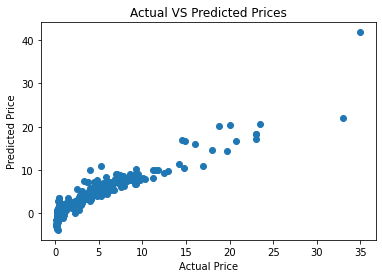

In [28]:
plt.scatter(Y_train, training_data_prdiction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual VS Predicted Prices")
plt.show()

Test Data

In [23]:
test_data_prdiction = lin_reg_model.predict(X_test)

In [24]:
#R Squred Error
error_score = metrics.r2_score(Y_test, test_data_prdiction)
print("R squared error:",error_score)

R squared error: 0.8365766715027051


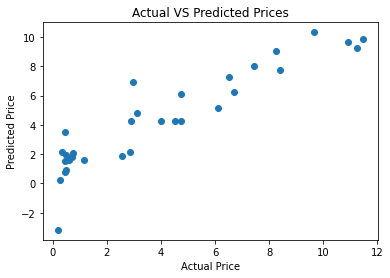

In [29]:
plt.scatter(Y_test, test_data_prdiction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual VS Predicted Prices")
plt.show()